In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from common import load_font, colors, set_plot_style

In [2]:
ROOT_FOLDER = Path("/home/robin/projects/TEDx/")

co2_file = ROOT_FOLDER / "data" / "SSP" / "CO2.csv"
pil_file = ROOT_FOLDER / "data" / "SSP" / "PIL.csv"
population_file = ROOT_FOLDER / "data" / "SSP" / "Population.csv"
temperature_file = ROOT_FOLDER / "data" / "SSP" / "Temperature.csv"

images_dir = Path(ROOT_FOLDER / "output" / "images" / "ssp")
images_dir.mkdir(parents=True, exist_ok=True)

load_font()
plt.style.use("default")
set_plot_style()

In [3]:
t_hist = pd.read_csv(
    temperature_file.with_name("Temperature_historical.csv"),
    parse_dates=True,
    index_col="Date",
    date_format="%Y%m",
).groupby(lambda x: x.year).mean()
t_hist.rename(columns={"Anomaly": "Storico"}, inplace=True)
t_hist += 0.2
t_hist.to_csv(temperature_file.with_name("Temperature_historical_annual.csv"))

In [4]:
co2 = pd.read_csv(co2_file, index_col="Scenario").T / 1000
pil = pd.read_csv(pil_file, index_col="Scenario").T / 1000
population = pd.read_csv(population_file, index_col="Scenario").T / 1000
temperature = pd.read_csv(temperature_file, index_col="Scenario").T


In [5]:
co2.index = co2.index.astype(int)
pil.index = pil.index.astype(int)
population.index = population.index.astype(int)
temperature.index = temperature.index.astype(int)


In [6]:
temperature = temperature.join(t_hist, how="outer").sort_index().interpolate(
    method="linear"
)
temperature.loc[2006:, "Storico"] = pd.NA


In [7]:
# Move "Storico" column to the end for all dataframes
for df in [co2, pil, population, temperature]:
    if "Storico" in df.columns:
        storico = df.pop("Storico")
        df["Storico"] = storico



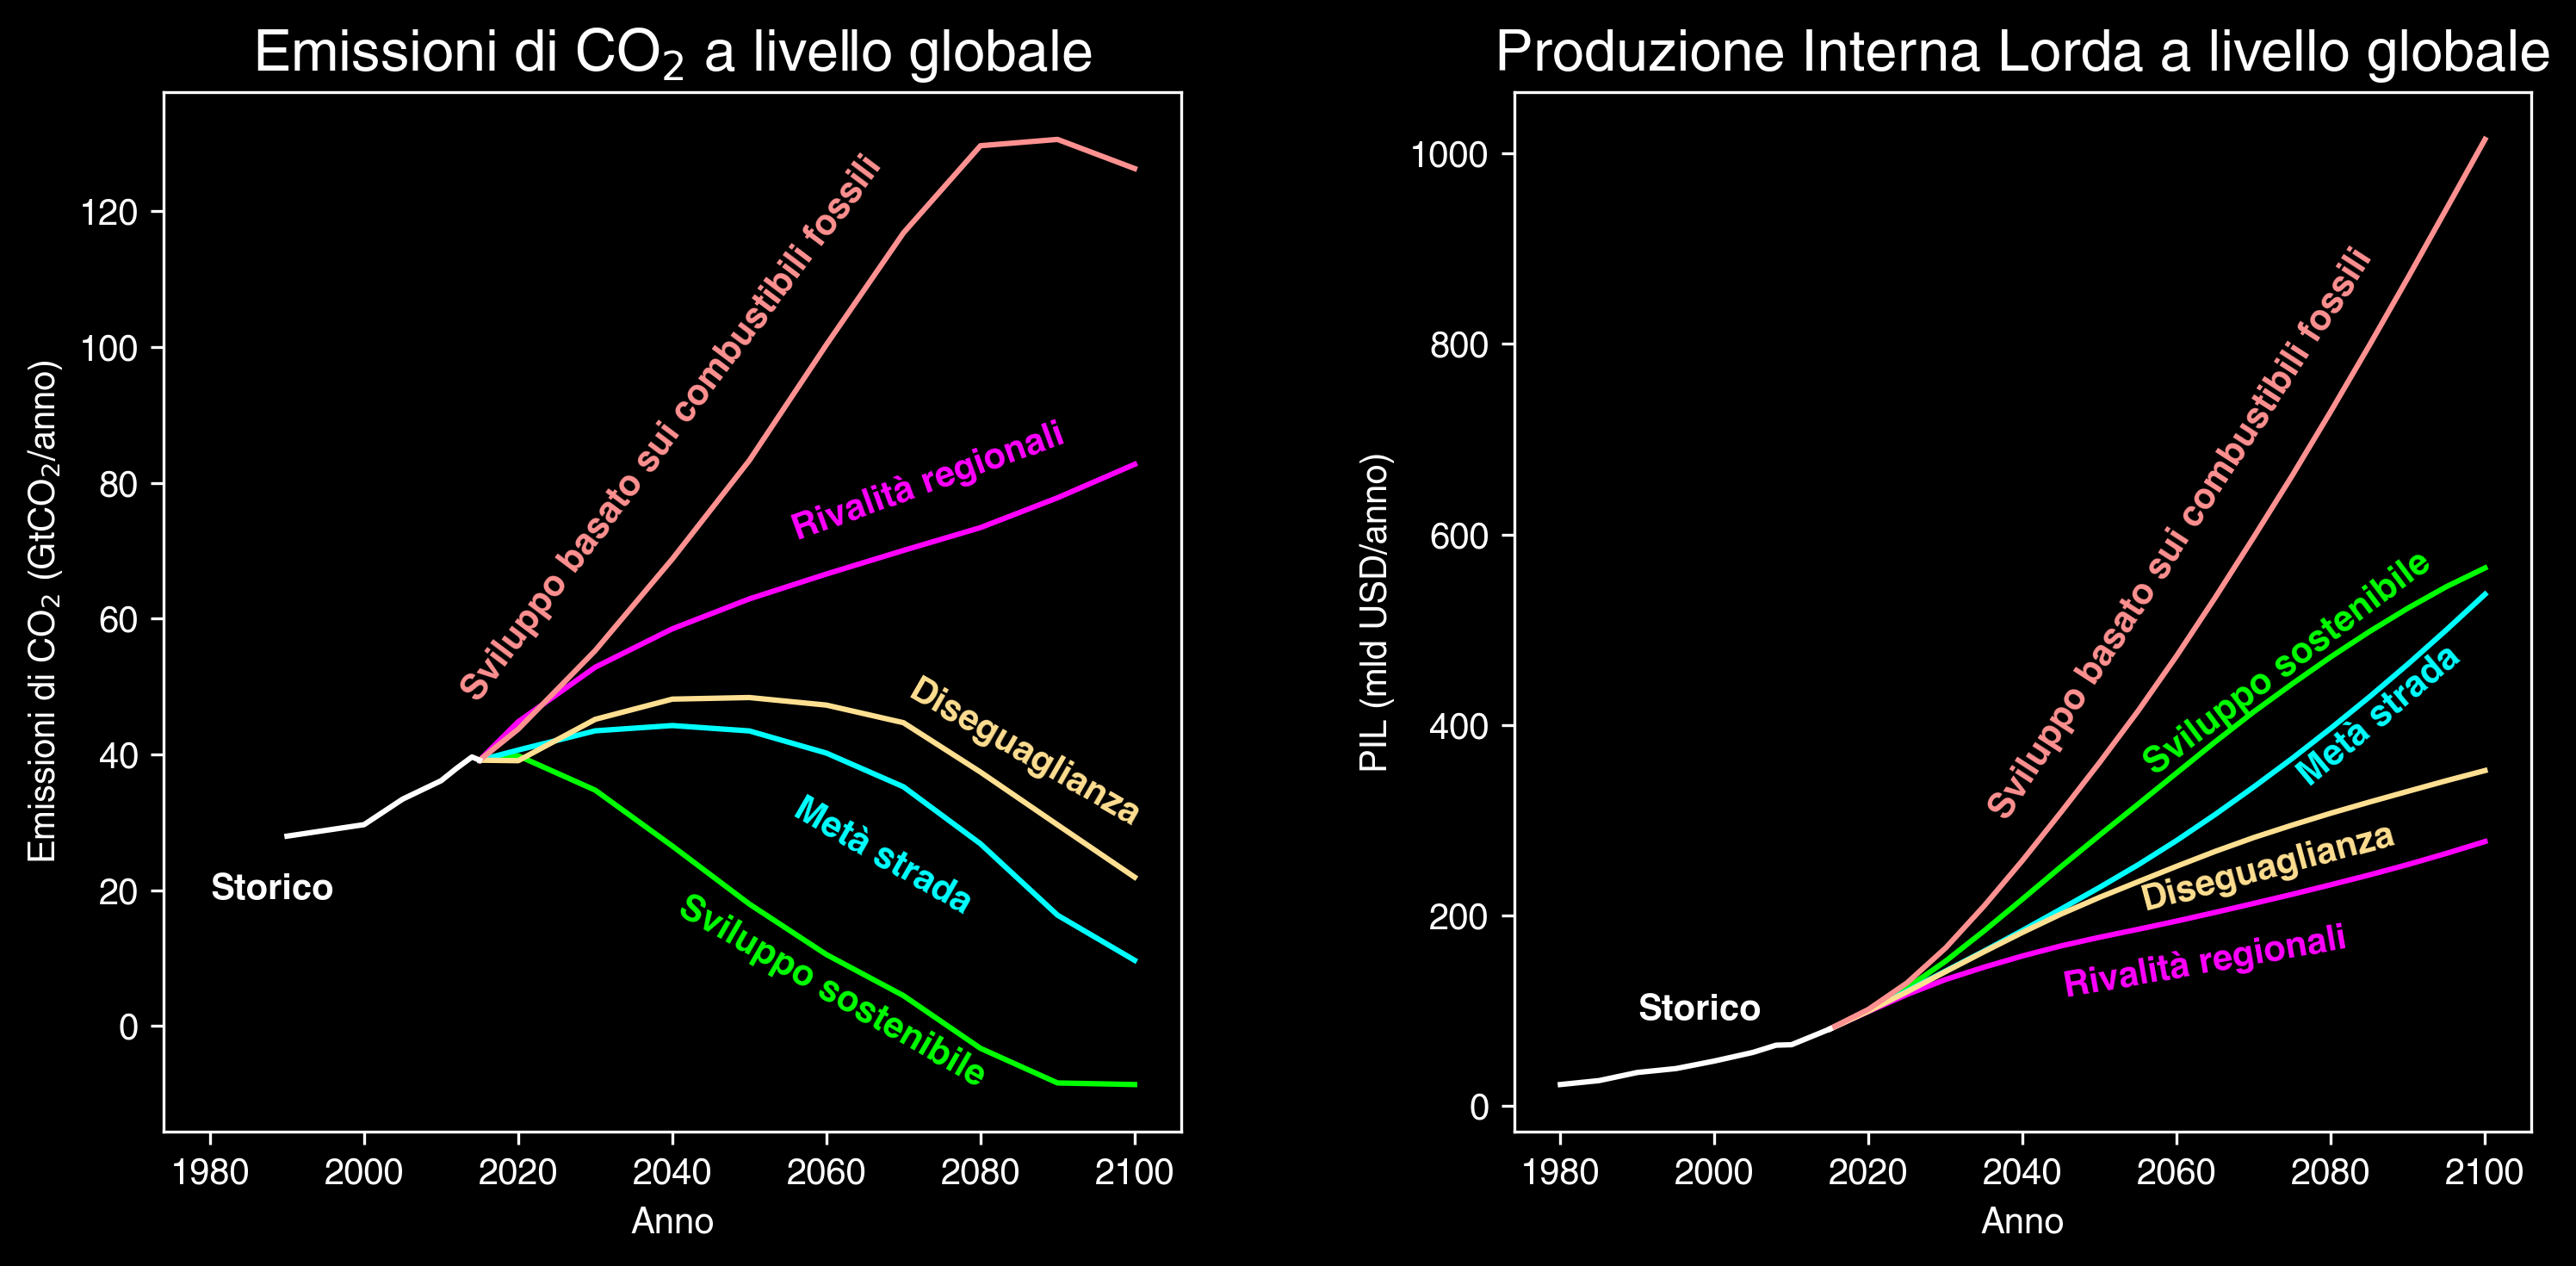

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

xy_labels = {
    "co2": {
        "Sviluppo sostenibile": (2040, 5),
        "Metà strada": (2055, 25),
        "Rivalità regionali": (2055, 80),
        "Diseguaglianza": (2070, 40),
        "Sviluppo basato sui combustibili fossili": (2012, 88),
        "Storico": (1980, 20),
    },
    "pil": {
        "Sviluppo sostenibile": (2055, 465),
        "Metà strada": (2075, 410),
        "Rivalità regionali": (2045, 150),
        "Diseguaglianza": (2055, 250),
        "Sviluppo basato sui combustibili fossili": (2035, 600),
        "Storico": (1990, 100),
    },
}

rotation_labels = {
    "co2": {
        "Sviluppo sostenibile": -30,
        "Metà strada": -30,
        "Rivalità regionali": 20,
        "Diseguaglianza": -30,
        "Sviluppo basato sui combustibili fossili": 53,
        "Storico": 0,
    },
    "pil": {
        "Sviluppo sostenibile": 37,
        "Metà strada": 40,
        "Rivalità regionali": 10,
        "Diseguaglianza": 15,
        "Sviluppo basato sui combustibili fossili": 57,
        "Storico": 0,
    },
}

lines = co2.plot(ax=axs[0], legend=False, color=colors.values()).get_lines()
for line, column in zip(lines, co2.columns):
    # Add label at the end of each line with matching color
    axs[0].annotate(
        column,
        xy=xy_labels["co2"][column],
        va="center",
        color=line.get_color(),  # Use same color as the line
        weight="bold",
        rotation=rotation_labels["co2"][column],
    )
axs[0].set_title("Emissioni di CO$_2$ a livello globale")
axs[0].set_xlabel("Anno")
axs[0].set_ylabel("Emissioni di CO$_2$ (GtCO$_2$/anno)")

lines = pil.plot(ax=axs[1], legend=False, color=colors).get_lines()
for line, column in zip(lines, pil.columns):
    axs[1].annotate(
        column,
        xy=xy_labels["pil"][column],
        va="center",
        color=line.get_color(),  # Use same color as the line
        weight="bold",
        rotation=rotation_labels["pil"][column],
    )
axs[1].set_title("Produzione Interna Lorda a livello globale")
axs[1].set_xlabel("Anno")
axs[1].set_ylabel("PIL (mld USD/anno)")

plt.tight_layout(w_pad=5)  # Add horizontal spacing between subplots

plt.show()
fig.savefig(images_dir / "co2_pil.png")

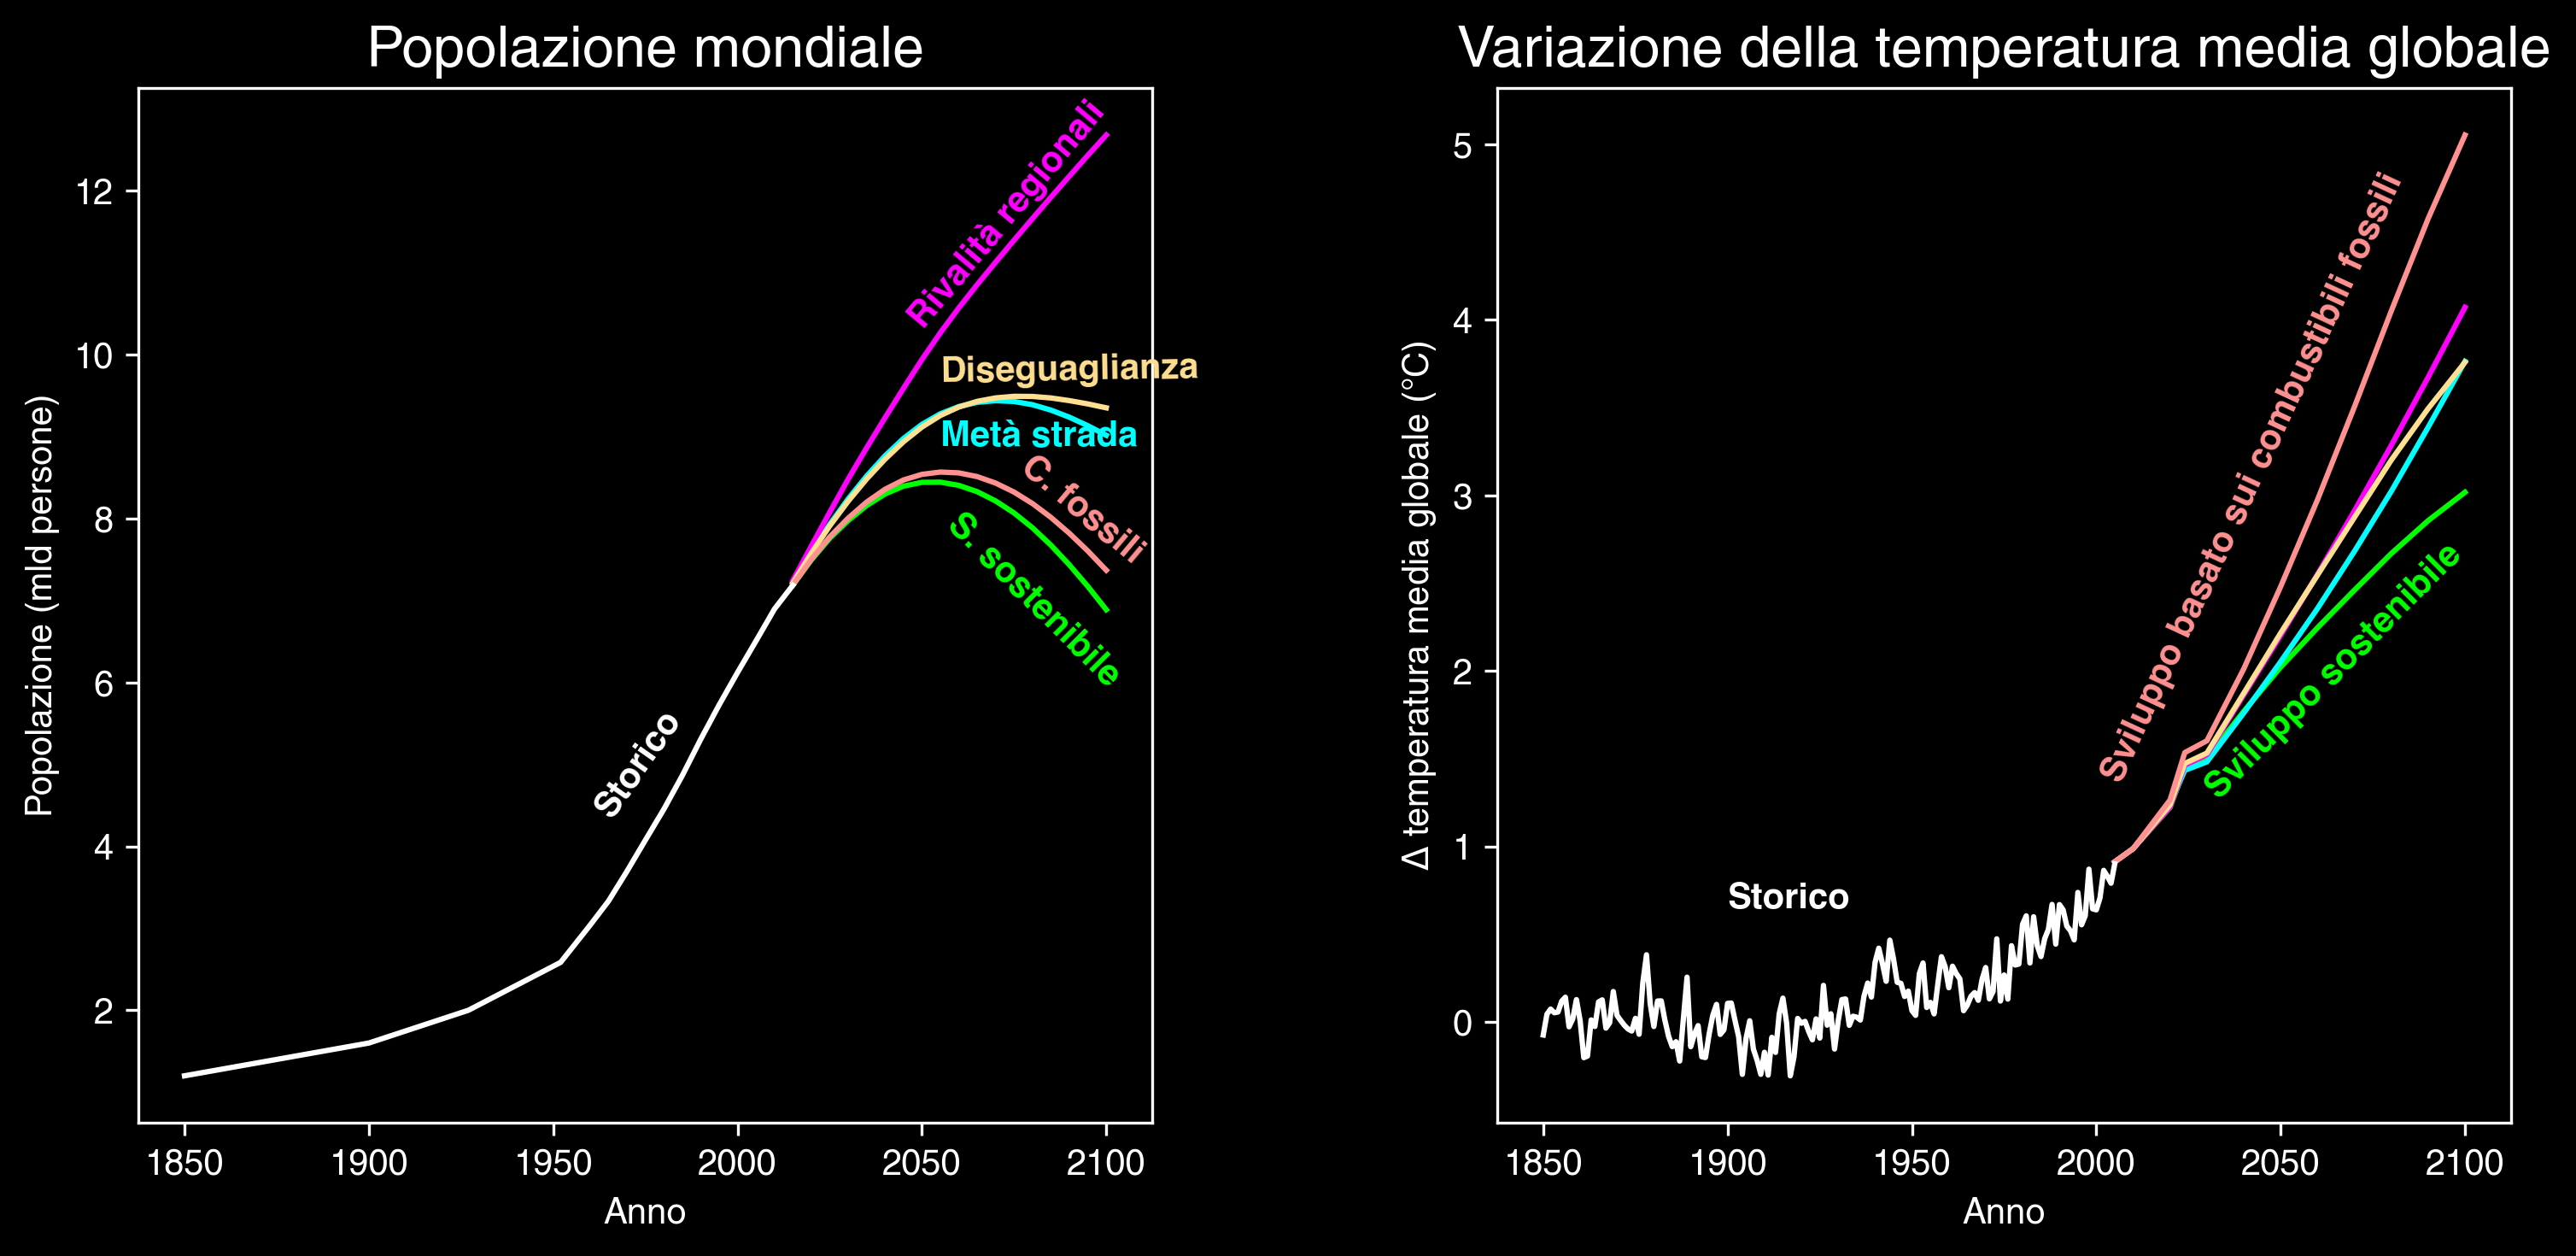

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

xy_labels = {
    "population": {
        "Sviluppo sostenibile": (2055, 7),
        "Metà strada": (2055, 9),
        "Rivalità regionali": (2045, 11.7),
        "Diseguaglianza": (2055, 9.8),
        "Sviluppo basato sui combustibili fossili": (2075, 8.1),
        "Storico": (1960, 5),
    },
    "temperature": {
        "Sviluppo sostenibile": (2028, 2),
        "Metà strada": (2055, 9),
        "Rivalità regionali": (2050, 11.7),
        "Diseguaglianza": (2055, 9.8),
        "Sviluppo basato sui combustibili fossili": (2000, 3.1),
        "Storico": (1900, 0.7),
    },
}

rotation_labels = {
    "population": {
        "Sviluppo sostenibile": -45,
        "Metà strada": 0,
        "Rivalità regionali": 50,
        "Diseguaglianza": 1,
        "Sviluppo basato sui combustibili fossili": -40,
        "Storico": 55,
    },
    "temperature": {
        "Sviluppo sostenibile": 45,
        "Metà strada": 0,
        "Rivalità regionali": 40,
        "Diseguaglianza": 0,
        "Sviluppo basato sui combustibili fossili": 65,
        "Storico": 0,
    },
}

custom_labels = {
    "Sviluppo sostenibile": "S. sostenibile",
    "Sviluppo basato sui combustibili fossili": "C. fossili",
}

lines = population.plot(ax=axs[0], legend=False, color=colors.values()).get_lines()
for line, column in zip(lines, population.columns):
    axs[0].annotate(
        custom_labels.get(column, column),
        xy=xy_labels["population"][column],
        va="center",
        color=line.get_color(),  # Use same color as the line
        weight="bold",
        rotation=rotation_labels["population"][column],
    )
axs[0].set_title("Popolazione mondiale")
axs[0].set_xlabel("Anno")
axs[0].set_ylabel("Popolazione (mld persone)")

lines = temperature.plot(ax=axs[1], legend=False, color=colors.values()).get_lines()
for line, column in zip(lines, temperature.columns):
    axs[1].annotate(
        column,
        xy=xy_labels["temperature"][column],
        va="center",
        color=line.get_color(),  # Use same color as the line
        weight="bold",
        rotation=rotation_labels["temperature"][column],
    )
axs[1].set_title("Variazione della temperatura media globale")
axs[1].set_xlabel("Anno")
axs[1].set_ylabel("$\Delta$ temperatura media globale (°C)")

plt.tight_layout(w_pad=5)  # Add horizontal spacing between subplots

plt.show()
fig.savefig(images_dir / "population_temperature.png")